In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk import  word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,recall_score,precision_score

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
Raw_Data=pd.read_csv('scrap_news.csv')
# Raw_Data=pd.read_csv('all.csv')
aa=Raw_Data.groupby('label').count().reset_index()
plt.figure(figsize = (5,5))
sns.barplot(x =['business','Sports','entertainment','opinion'],y = "news",data = aa,
                linewidth = 1 ,edgecolor = "k"*5,palette = "Reds")
plt.title("News Distribution of Different Label",fontsize=15)
plt.ylabel('Number Of News',fontsize=10)
plt.show()


In [3]:
Raw_Data

,Unnamed: 0,news,label
0,0,काठमाडौँ — ट्वान्टी–२० मा स्कटल्यान्डबाट ओपनिङ...,खेलकुद
1,1,म्यानचेस्टर — म्यानचेस्टर सिटी व्यवस्थापक पेप ...,खेलकुद
2,2,धनगढी — देशकै सर्वाधिक धनराशिको चौथो अन्तर्राष...,खेलकुद
3,3,सुनसरी — आयोजक धरान फुटबल क्लबले २२ औं आमन्त्र...,खेलकुद
4,4,बिर्तामोड — रुस्लान थ्रीस्टार क्लब झिलझिलेमा ज...,खेलकुद
...,...,...,...
570,103,दसैं बहिष्कारको राजनीतिले ठाउँ पाएको निकै भइसक...,विचार
571,104,चिनियाँ राष्ट्रपति सी चिनफिङको आसन्न (सम्भावित...,विचार
572,105,चाडपर्व आएपछि मात्रै हामी उपभोग्य सामानका मूल्...,विचार
573,106,चीनका राष्ट्रपति सी चिनफिङले शनिबारबाट गर्न ला...,विचार


In [5]:
stop = stopwords.words('nepali')
Raw_Data['stopwords'] = Raw_Data['news'].apply(lambda x: len([x for x in x.split() if x in stop]))
Raw_Data[['news','stopwords']].head()

,news,stopwords
0,काठमाडौँ — ट्वान्टी–२० मा स्कटल्यान्डबाट ओपनिङ...,29
1,म्यानचेस्टर — म्यानचेस्टर सिटी व्यवस्थापक पेप ...,73
2,धनगढी — देशकै सर्वाधिक धनराशिको चौथो अन्तर्राष...,19
3,सुनसरी — आयोजक धरान फुटबल क्लबले २२ औं आमन्त्र...,64
4,बिर्तामोड — रुस्लान थ्रीस्टार क्लब झिलझिलेमा ज...,48


In [6]:
stop_words = stopwords.words("nepali")
def string_manipulation(df,column)  : 
    df[column] = df[column].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split()if i not in (stop_words)]))

    return df
Data = string_manipulation(Raw_Data,"news")
Data = Data.sample(frac=1,random_state=20).reset_index(drop=True)
Data['news'][0]


'काठमाडौँ नेपाली राष्ट्रिय फुटबल टिमले विश्वकप छनोटमा बिहीबार फिफा वरीयतामा स्थानमाथिको अस्ट्रेलियाविरुद्ध प्रतिस्पर्धा गर्दैछ पाँचपल्ट विश्वकप खेलिसकेको अस्ट्रेलियाले सहजै जित्ने अनुमान धेरैले नेपालका प्रशिक्षक योहान कालीन प्रतिद्वन्द्वी बलियो त्यसको सामना तयार बताएका अस्ट्रेलियाको राजधानीस्थित जीआईओ रंगशालामा खेलमा हजार नेपाली समर्थकको उपस्थिति अनुमान गरिएको यसले नेपाली टिमलार्य उत्साहित बनाउनेछ खेलाडी समग्र टिमको स्तरलार्य हेर्ने अस्ट्रेलियासँग नेपाली फुटबललाई स्तरमा राखेर दाँज्नु मूर्खता मिनेटको खेलमा हुनसक्छ यस्तोमा नेपाली टिम अस्ट्रेलियालाई स्तब्ध पार्न चाहन्छ सिड्नीमा बडादसैं मनाएको नेपाली टिमको सबभन्दा ठूलो चुनौती भनेको वर्षअघिको एसियाली च्याम्पियनलाई गोल गर्नबाट रोक्नु हुनेछ एसियन कप छनोटको रुपमा विश्वकप छनोटमा नेपालले खेल खेलिसकेको खेलमा कुवेतमा अनपेक्षित हार बेहोरेको नेपालले त्यसको दिनमा ताइवानमा जित निकालेको त्यसैले नेपाललाई अन्तर्राष्ट्रिय फुटबलमै अनपेक्षित प्रदर्शन टिमको रुपमा लिइन्छ यसबाट अस्ट्रेलिया सतर्क सकरुजले परिचित अस्ट्रेलियाली टिमले विश्वकप छनोटमा खेलमात्र खेलेको

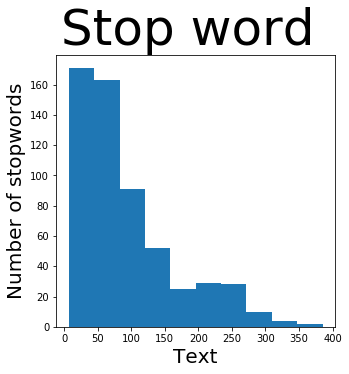

In [7]:
plt.figure(figsize=(5,5))
plt.title("Stop word ",fontsize=50)
plt.xlabel("Text",fontsize=20)
plt.ylabel("Number of stopwords",fontsize=20)
plt.hist(Data.stopwords)
plt.show()

In [8]:
pop_wrds = (Data["news"].apply(lambda x : 
                                         pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
pop_wrds.columns = ["word","count"]
pop_wrds.head()

,word,count
0,नेपाली,700.0
222,रूपमा,642.0
1770,बताए,637.0
666,सय,617.0
177,हजार,578.0


/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sudu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarn

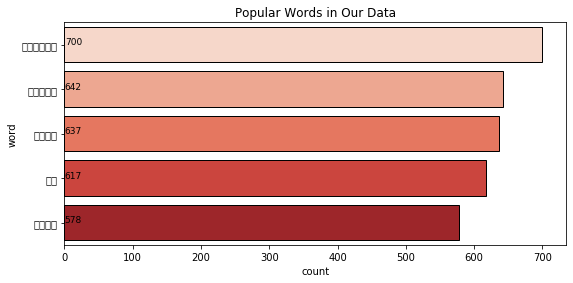

In [9]:
plt.figure(figsize = (9,9))
plt.subplot(211)
ax = sns.barplot(x = "count",y = "word",data = pop_wrds[:5],
                linewidth = 1 ,edgecolor = "k"*5,palette = "Reds")
plt.title("Popular Words in Our Data")

for i,j in enumerate(pop_wrds["count"][:5].astype(int)) :
    ax.text(.8,i,j,fontsize = 9)

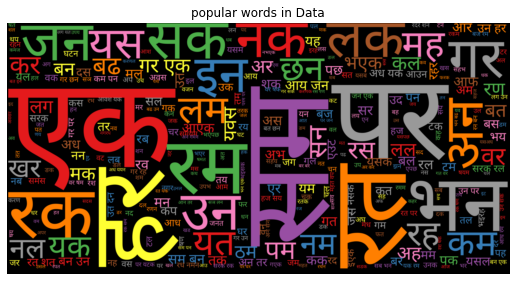

In [9]:
def build_word_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(font_path='NotoSans-Regular.ttf',scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize=(9,9))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
build_word_cloud(Data["news"],"black","Set1","popular words in Data")

In [10]:
total_word = Data.news.tolist()
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer.fit(total_word)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [11]:
news_train, news_test,label_train,label_test =train_test_split(Data['news'], Data['label'],test_size=0.2, random_state=1)

In [12]:
train_vectorized = vectorizer.transform(news_train)
test_vectorized = vectorizer.transform(news_test)

In [13]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC(C=1, kernel='sigmoid',gamma='auto'))
svm = svm.fit(train_vectorized, label_train)

In [14]:
svm_acc = svm.score(test_vectorized, label_test)
print('SVM accuracy', svm_acc)

SVM accuracy 0.8


In [15]:
review = ["आयोजनामा ट्वान्टी–२० क्रिकेट प्रतिगोगिता बुधबारदेखि सुरु भएको छ। महाराजगञ्जस्थित पाकिस्तान दूतावासको क्रिकेट ग्राउन्डमा भएको प्रतियोगिताको काठमाडौं महानगरपालिकाका मेयर विद्यासुन्दर शाक्यले उद्घाटन गरेका थिए।",
         "अर्ब ६३ करोड ६३ लाख ३९ हजार ५६० मूल्य बराबरको शेयर किनबेच भएको छ। नेपालस्टक एक्चेन्ज(नेप्से) परिसूचक साताभारमा १७ अंकले बढेको छ।"]

def print_prediction(review, model):
    print("*****EVALUATE REVIEW*******")
    review_vectorized = vectorizer.transform(review)
    y_pred = model.predict(review_vectorized)
    for each_review, each_y_pred in zip(review, y_pred):
        print("{0}: Category is -> {1}".format(each_review, each_y_pred))

In [16]:
print_prediction(review, svm)

*****EVALUATE REVIEW*******
आयोजनामा ट्वान्टी–२० क्रिकेट प्रतिगोगिता बुधबारदेखि सुरु भएको छ। महाराजगञ्जस्थित पाकिस्तान दूतावासको क्रिकेट ग्राउन्डमा भएको प्रतियोगिताको काठमाडौं महानगरपालिकाका मेयर विद्यासुन्दर शाक्यले उद्घाटन गरेका थिए।: Category is -> खेलकुद
अर्ब ६३ करोड ६३ लाख ३९ हजार ५६० मूल्य बराबरको शेयर किनबेच भएको छ। नेपालस्टक एक्चेन्ज(नेप्से) परिसूचक साताभारमा १७ अंकले बढेको छ।: Category is -> अर्थ / वाणिज्य


In [17]:
predict=svm.predict(test_vectorized)
SVMTrainAccuracy=svm.score(train_vectorized,label_train)
SVMTestAccuracy=svm.score(test_vectorized,label_test)
SVMAccuracy=accuracy_score(predict,label_test)
SVMRecall=recall_score(predict,label_test,average = "macro")
SVMPrecision=precision_score(predict,label_test,average = "macro")
SVMF1_score=f1_score(predict,label_test,average = "macro")
accuracy=[[SVMAccuracy,SVMRecall,SVMPrecision,SVMF1_score,SVMTrainAccuracy,SVMTestAccuracy]]
df = pd.DataFrame(accuracy,columns = [ 'accuracy','recall','precision','F1','TrainAccuracy','TestAccuracy'])

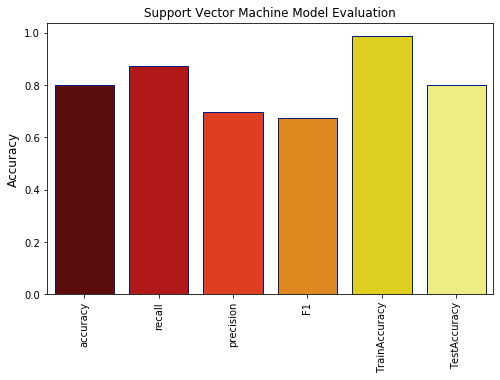

In [18]:
plt.figure(figsize = (8,5))
sns.barplot(data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('Support Vector Machine Model Evaluation')
plt.ylabel('Accuracy',fontsize=12)
plt.show()

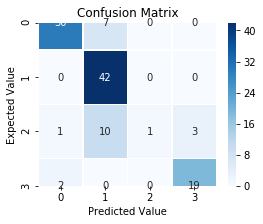

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(label_test,predict), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Confusion Matrix')
plt.show()


In [20]:

from sklearn.naive_bayes import MultinomialNB, BernoulliNB 

nb_clf = MultinomialNB()

In [21]:
NB=nb_clf.fit(train_vectorized,label_train)

In [22]:
review = ["आयोजनामा ट्वान्टी–२० क्रिकेट प्रतिगोगिता बुधबारदेखि सुरु भएको छ। महाराजगञ्जस्थित पाकिस्तान दूतावासको क्रिकेट ग्राउन्डमा भएको प्रतियोगिताको काठमाडौं महानगरपालिकाका मेयर विद्यासुन्दर शाक्यले उद्घाटन गरेका थिए।",
         "अर्ब ६३ करोड ६३ लाख ३९ हजार ५६० मूल्य बराबरको शेयर किनबेच भएको छ। नेपालस्टक एक्चेन्ज(नेप्से) परिसूचक साताभारमा १७ अंकले बढेको छ।"]

def print_prediction(review, model):
    print("*****EVALUATE REVIEW*******")
    review_vectorized = vectorizer.transform(review)
    y_pred = model.predict(review_vectorized)
    for each_review, each_y_pred in zip(review, y_pred):
        print("{0}: Category is -> {1}".format(each_review, each_y_pred))

In [23]:
print_prediction(review, NB)

*****EVALUATE REVIEW*******
आयोजनामा ट्वान्टी–२० क्रिकेट प्रतिगोगिता बुधबारदेखि सुरु भएको छ। महाराजगञ्जस्थित पाकिस्तान दूतावासको क्रिकेट ग्राउन्डमा भएको प्रतियोगिताको काठमाडौं महानगरपालिकाका मेयर विद्यासुन्दर शाक्यले उद्घाटन गरेका थिए।: Category is -> अर्थ / वाणिज्य
अर्ब ६३ करोड ६३ लाख ३९ हजार ५६० मूल्य बराबरको शेयर किनबेच भएको छ। नेपालस्टक एक्चेन्ज(नेप्से) परिसूचक साताभारमा १७ अंकले बढेको छ।: Category is -> अर्थ / वाणिज्य


In [29]:
predict=NB.predict(test_vectorized)
NB_acc = NB.score(test_vectorized, label_test)
print('NB accuracy', NB_acc)


NB accuracy 0.7739130434782608


In [30]:
NBTrainAccuracy=NB.score(train_vectorized,label_train)
NBTestAccuracy=NB.score(test_vectorized,label_test)
NBAccuracy=accuracy_score(predict,label_test)
NBRecall=recall_score(predict,label_test,average = "macro")
NBPrecision=precision_score(predict,label_test,average = "macro")
NBF1_score=f1_score(predict,label_test,average = "macro")
accuracy=[[NBAccuracy,NBRecall,NBPrecision,NBF1_score,NBTrainAccuracy,NBTestAccuracy]]
df = pd.DataFrame(accuracy,columns = [ 'accuracy','recall','precision','F1','TrainAccuracy','TestAccuracy'])

/home/sudu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/sudu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


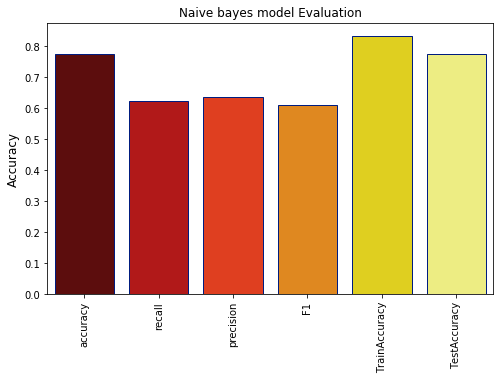

In [33]:
plt.figure(figsize = (8,5))
sns.barplot(data=df,palette='hot',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('Naive bayes model Evaluation')
plt.ylabel('Accuracy',fontsize=12)
plt.show()

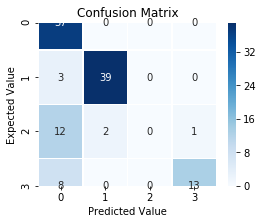

In [32]:
fig, ax = plt.subplots(figsize=(4,3))
confusion_mat=sns.heatmap(confusion_matrix(label_test,predict), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Confusion Matrix')
plt.show()
